In [1]:
import numpy as np
# for dataframe manipulations
import pandas as pd
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for missing values
import datetime
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import multiprocessing
import time


In [2]:
#read the data
data=pd.read_csv(r"C:\Users\User\Downloads\train.csv")

In [3]:

# lets also check the shape of the dataset
print(data.shape)

(15681, 18)


In [4]:
data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


In [5]:
data.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

# Missing Values

In [6]:
data.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [7]:
objList = data.select_dtypes(include = "object").columns

# Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
data[objList] = data[objList].apply(le.fit_transform)

In [10]:
data['tempo'] = pd.to_numeric(arg = data['tempo'])

In [11]:
data['popularity'].fillna(data['popularity'].mean(), inplace = True)
data['danceability'].fillna(data['danceability'].mean(), inplace = True)
data['duration_ms'].fillna(data['duration_ms'].mean(), inplace = True)
data['energy'].fillna(data['energy'].mean(), inplace = True)
data['instrumentalness'].fillna(data['instrumentalness'].mean(), inplace = True)
data['loudness'].fillna(data['loudness'].mean(), inplace = True)
data['speechiness'].fillna(data['speechiness'].mean(), inplace = True)
data['valence'].fillna(data['valence'].mean(), inplace = True)
data[['voice_gender', 'mode', 'musician_category']] = data[['voice_gender', 'mode', 'musician_category']].fillna('X')
data['tempo'].fillna(data['tempo'].mean(), inplace = True)



In [12]:
data.isna().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

# Descriptive Analysis

In [13]:
data.describe()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
count,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000,1.568100e+04,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000,15681.000000
mean,7840.000000,7383.263057,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,5.345514,0.194089,-11.621471,1.100121,1.277278,0.096411,6708.944328,1.169696,0.451400,3.443275
std,4526.859121,4266.481883,17.314066,0.416981,0.211198,1.563604e+05,0.512602,0.394587,3.430914,0.160291,8.653413,0.902406,0.585235,0.105559,3868.005696,0.965457,0.271169,2.352319
min,0.000000,0.000000,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.000000,0.016652,-50.054000,0.000000,0.000000,0.023858,0.000000,0.000000,0.000000,0.000000
25%,3920.000000,3695.000000,39.414000,0.044521,0.425694,1.864208e+05,0.159934,0.000000,3.000000,0.101674,-15.478000,0.000000,1.000000,0.039563,3338.000000,0.000000,0.222389,0.000000
50%,7840.000000,7365.000000,53.135000,0.295272,0.576149,2.368236e+05,0.557718,0.000801,5.000000,0.128784,-8.627000,1.000000,1.000000,0.050502,6663.000000,1.000000,0.451400,4.000000
75%,11760.000000,11062.000000,63.064000,0.929001,0.726697,2.969948e+05,0.790423,0.632455,8.000000,0.228973,-5.724000,2.000000,2.000000,0.094725,10261.000000,2.000000,0.652638,5.000000
max,15680.000000,14798.000000,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,11.000000,1.080959,1.389000,3.000000,3.000000,1.000445,12331.000000,3.000000,1.076971,6.000000


# Check the shape of the data

In [14]:
data.shape

(15681, 18)

In [15]:
data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,3659,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,541,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,14449,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,2023,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,11036,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


# Data preprocessing

# Min Max Scaling¶

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data.iloc[:, 2:-1] = scaler.fit_transform(data.iloc[:, 2:-1].values)

# Correlation Analysis

In [17]:

crm = data.corr()

In [18]:
crm

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
instance_id,1.000000,-0.005301,-0.000323,-0.005106,-0.008613,-0.009723,0.003470,-0.001216,0.004614,-0.000788,0.007448,-0.005635,0.016633,-0.007707,-0.002094,0.009485,0.006379,-0.002951
track_name,-0.005301,1.000000,-0.041365,0.047355,-0.041921,0.039298,-0.024395,0.029589,-0.004594,-0.009484,-0.032377,-0.011516,0.009144,-0.018841,0.004209,-0.004506,-0.024487,-0.037001
popularity,-0.000323,-0.041365,1.000000,-0.550235,0.432762,-0.152426,0.285955,-0.479226,-0.003570,-0.000503,0.512504,-0.006775,-0.002470,0.193575,-0.052543,-0.000797,0.290776,0.695341
acousticness,-0.005106,0.047355,-0.550235,1.000000,-0.532573,0.139678,-0.473421,0.525426,0.006788,-0.117700,-0.722909,-0.002237,-0.032351,-0.235678,0.090716,0.008486,-0.394576,-0.630916
danceability,-0.008613,-0.041921,0.432762,-0.532573,1.000000,-0.227517,0.269353,-0.419891,-0.006881,0.018296,0.521112,-0.002811,0.061708,0.329316,-0.135852,-0.011546,0.536369,0.519646
duration_ms,-0.009723,0.039298,-0.152426,0.139678,-0.227517,1.000000,-0.084349,0.179116,-0.011807,-0.015443,-0.145514,-0.001017,-0.000907,-0.108034,0.012065,-0.014802,-0.189337,-0.178482
energy,0.003470,-0.024395,0.285955,-0.473421,0.269353,-0.084349,1.000000,-0.301886,0.005501,0.105306,0.447299,-0.000320,0.011046,0.108477,-0.053866,-0.002151,0.291180,0.340192
instrumentalness,-0.001216,0.029589,-0.479226,0.525426,-0.419891,0.179116,-0.301886,1.000000,0.008861,-0.143528,-0.553986,0.003758,0.032284,-0.248306,0.062810,-0.004327,-0.335109,-0.547821
key,0.004614,-0.004594,-0.003570,0.006788,-0.006881,-0.011807,0.005501,0.008861,1.000000,0.000566,-0.009171,-0.001637,-0.040030,-0.008538,-0.003262,0.014201,-0.005025,-0.013036
liveness,-0.000788,-0.009484,-0.000503,-0.117700,0.018296,-0.015443,0.105306,-0.143528,0.000566,1.000000,0.130781,0.003873,-0.006939,0.135582,-0.026769,0.021947,0.072154,0.070069


# Correlation Heatmap plot of whole dataset
# Plot correlation matrix in heatmap

<Axes: >

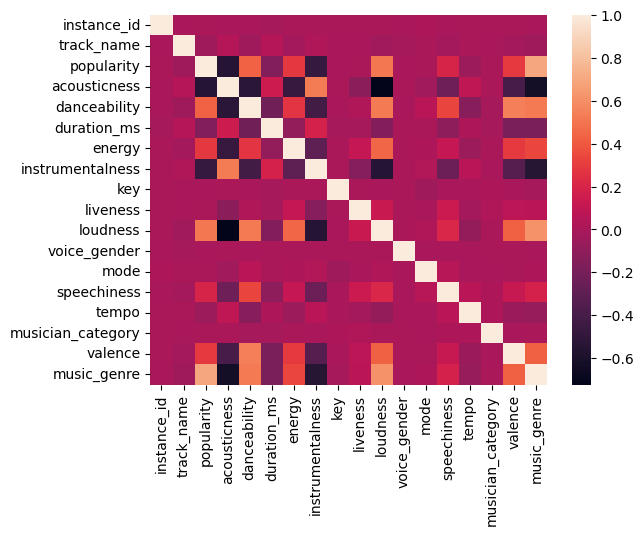

In [19]:
sns.heatmap(data =data.corr())

In [20]:
features = (crm[((crm['music_genre'] > 0.05) | (crm['music_genre'] < -0.05))].index).values

In [21]:
features

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'music_genre'], dtype=object)

In [22]:
features = np.delete(features, -1)

<Axes: xlabel='music_genre', ylabel='count'>

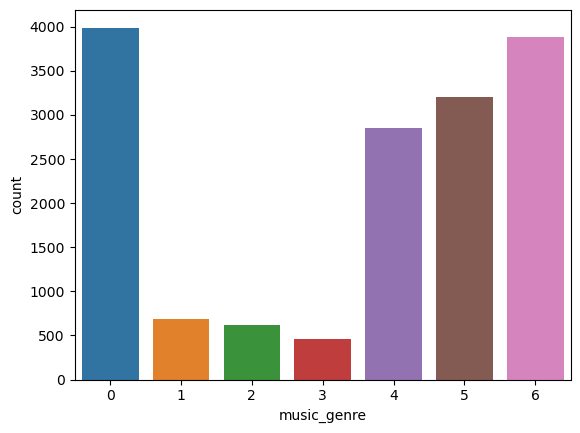

In [23]:
sns.countplot(x = 'music_genre', data = data)

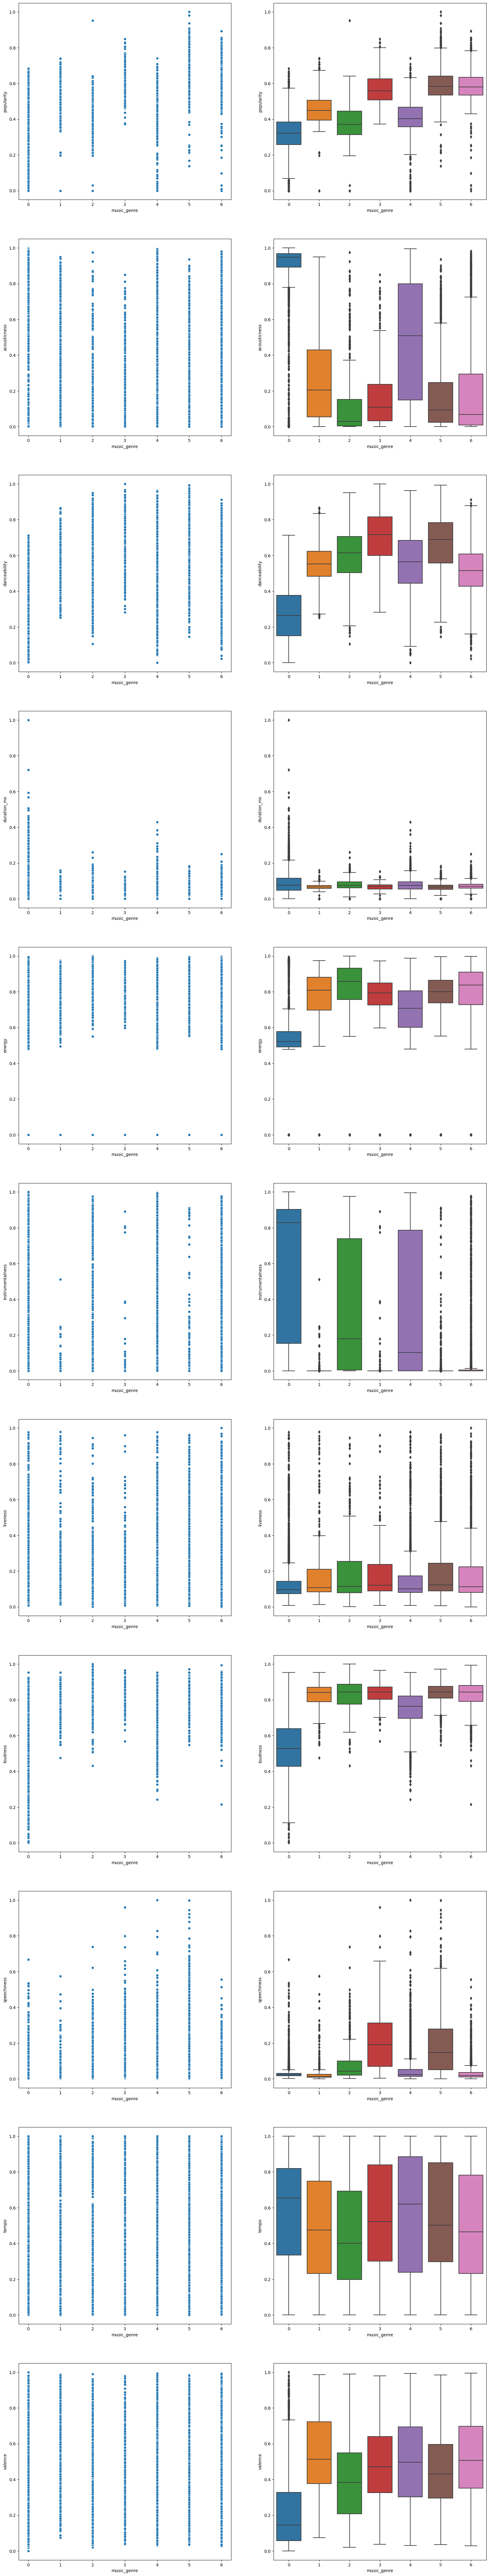

In [24]:
fig, axes = plt.subplots(np.size(features), 2, figsize = (20, 10 * np.size(features)))
for i, f in enumerate(features):
    sns.scatterplot(x = 'music_genre', y = f, data = data, ax = axes[i, 0])
    sns.boxplot(x = 'music_genre', y = f, data = data, ax = axes[i, 1])

# Train test

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data[features], data['music_genre'], test_size = 0.25, random_state = 11)

In [26]:
X_train.shape, y_train.shape

((11760, 11), (11760,))

In [27]:

X_val.shape, y_val.shape

((3921, 11), (3921,))

# Modelling using different Algorithms

# LogisticRegression

In [28]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='newton-cg', class_weight='balanced')
lr_clf=lr.fit(X_train,y_train)

In [29]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [30]:
y_predictions=lr_clf.predict(X_val)

In [31]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix


print('Accuracy=',accuracy_score(y_val,y_predictions))
print('Precision=',precision_score(y_val,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_val,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_val,y_predictions,average='weighted'))

Accuracy= 0.627135934710533
Precision= 0.7410196849939356
recall_score= 0.627135934710533
f1_score= 0.6541367703545969


In [32]:

confusion_matrix(y_val,y_predictions)

array([[880,  35,  49,   0,  51,   0,   5],
       [  1, 112,  12,   5,  11,   1,  28],
       [  8,  12, 102,   7,  16,   3,   3],
       [  0,   8,   1,  62,   2,  35,   6],
       [ 70, 139, 132,  23, 308,   2,  29],
       [  0,  36,  13, 314,   6, 297, 117],
       [  7, 155,  17,  19,  24,  60, 698]], dtype=int64)

In [33]:

from sklearn.model_selection import KFold
Kfold_validator=KFold(5)

In [34]:

from sklearn.model_selection import KFold
Kfold_validator=KFold(5)

# KNeighborsClassifier

In [35]:

from sklearn.neighbors import KNeighborsClassifier

In [36]:

metric_k=[]
neighbors=np.arange(3,15)

In [37]:

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_predictions=classifier.predict(X_val)
    acc=accuracy_score(y_val,y_predictions)
    metric_k.append(acc)


In [38]:

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_predictions=classifier.predict(X_val)
    acc=accuracy_score(y_val,y_predictions)
    metric_k.append(acc)

In [39]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='euclidean')
classifier.fit(X_train,y_train)
y_predictions=classifier.predict(X_val)

In [40]:

print('Accuracy=',accuracy_score(y_val,y_predictions))
print('Precision=',precision_score(y_val,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_val,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_val,y_predictions,average='weighted'))
confusion_matrix(y_val,y_predictions)

Accuracy= 0.7148686559551135
Precision= 0.6859801587175849
recall_score= 0.7148686559551135
f1_score= 0.6974481772162592


array([[924,   5,   4,   0,  67,   2,  18],
       [  5,  31,   1,   1,  40,  15,  77],
       [ 22,   8,  44,   2,  43,  17,  15],
       [  0,   0,   2,   0,   3,  97,  12],
       [ 93,  34,  22,   2, 441,  43,  68],
       [  1,   3,   5,   8,  21, 592, 153],
       [ 14,  29,   6,   0,  61,  99, 771]], dtype=int64)

# SVC

In [41]:

from sklearn.svm import SVC
svmclf=SVC(kernel='linear',class_weight='balanced')
svmclf.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [42]:

print('Accuracy=',accuracy_score(y_val,y_predictions))
print('Precision=',precision_score(y_val,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_val,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_val,y_predictions,average='weighted'))
confusion_matrix(y_val,y_predictions)

Accuracy= 0.7148686559551135
Precision= 0.6859801587175849
recall_score= 0.7148686559551135
f1_score= 0.6974481772162592


array([[924,   5,   4,   0,  67,   2,  18],
       [  5,  31,   1,   1,  40,  15,  77],
       [ 22,   8,  44,   2,  43,  17,  15],
       [  0,   0,   2,   0,   3,  97,  12],
       [ 93,  34,  22,   2, 441,  43,  68],
       [  1,   3,   5,   8,  21, 592, 153],
       [ 14,  29,   6,   0,  61,  99, 771]], dtype=int64)

# RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [44]:
y_predictions=rf_clf.predict(X_val)


In [45]:
print('Accuracy=',accuracy_score(y_val,y_predictions))
print('Precision=',precision_score(y_val,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_val,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_val,y_predictions,average='weighted'))
confusion_matrix(y_val,y_predictions)

Accuracy= 0.7842387146136189
Precision= 0.7625321981103864
recall_score= 0.7842387146136189
f1_score= 0.7681511295069325


array([[930,   3,   9,   0,  71,   0,   7],
       [  2,  70,   2,   0,  42,   2,  52],
       [ 10,   3,  56,   0,  69,   7,   6],
       [  0,   0,   0,   0,   3, 102,   9],
       [ 69,  10,  11,   0, 534,  25,  54],
       [  1,   2,   3,   4,  13, 631, 129],
       [  5,   5,   1,   0,  35,  80, 854]], dtype=int64)